In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import express as px
from plotly import graph_objects as go

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
X, y, *_ = make_regression(
    n_samples=100, n_features=2, n_informative=2, n_targets=1, noise=50, random_state=42
)

In [3]:
df = pd.DataFrame({"feature1": X[:, 0], "feature2": X[:, 1], "target": y})
print(df.shape)
df.head()

(100, 3)


,feature1,feature2,target
0,-1.191303,0.656554,-22.779796
1,0.058209,-1.142970,-107.569629
2,0.586857,2.190456,201.122932
3,0.473238,-0.072829,1.480178
4,0.738467,0.171368,111.798503


<Axes: xlabel='feature2', ylabel='target'>

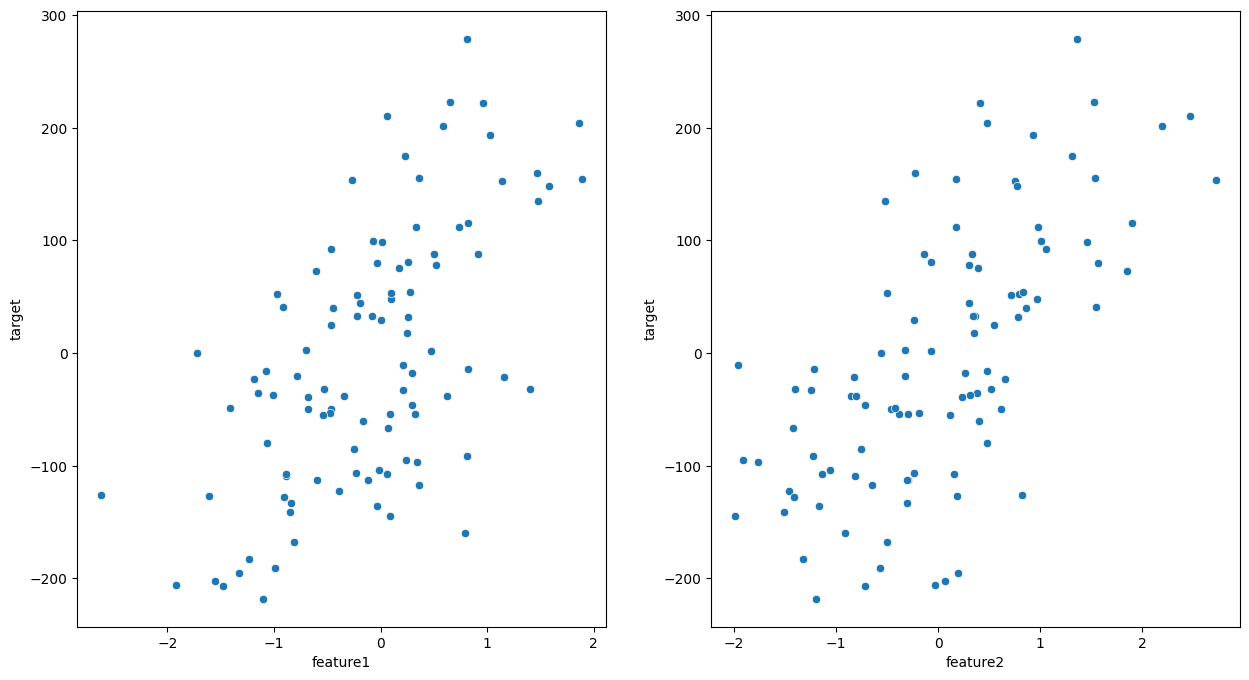

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

sns.scatterplot(df, x="feature1", y="target", ax=ax1)
sns.scatterplot(df, x="feature2", y="target", ax=ax2)

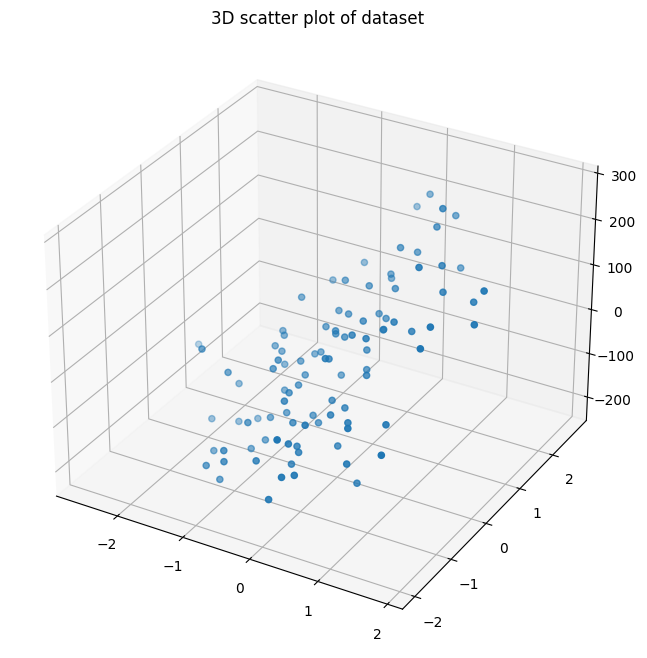

In [5]:
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection="3d")

ax.scatter3D(df["feature1"], df["feature2"], df["target"])
ax.set_title("3D scatter plot of dataset")
plt.show()

In [6]:
fig = px.scatter_3d(df, x="feature1", y="feature2", z="target")
fig.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = lr.predict(X_test)

In [10]:
lr.coef_

array([81.05675748, 72.39437821])

In [11]:
lr.intercept_

5.363809072090568

In [12]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [13]:
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("R2 score", r2_score(y_test, y_pred))

MAE 47.0876578106196
MSE 3639.6081061143377
R2 score 0.655121125764055


In [14]:
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
xGrid, yGrid = np.meshgrid(y, x)

final = np.vstack((xGrid.ravel().reshape(1, 100), yGrid.ravel().reshape(1, 100))).T
z = lr.predict(final).reshape(10, 10)

In [15]:
fig = px.scatter_3d(df, x="feature1", y="feature2", z="target")
fig.add_trace(go.Surface(x=x, y=y, z=z))
fig.show()

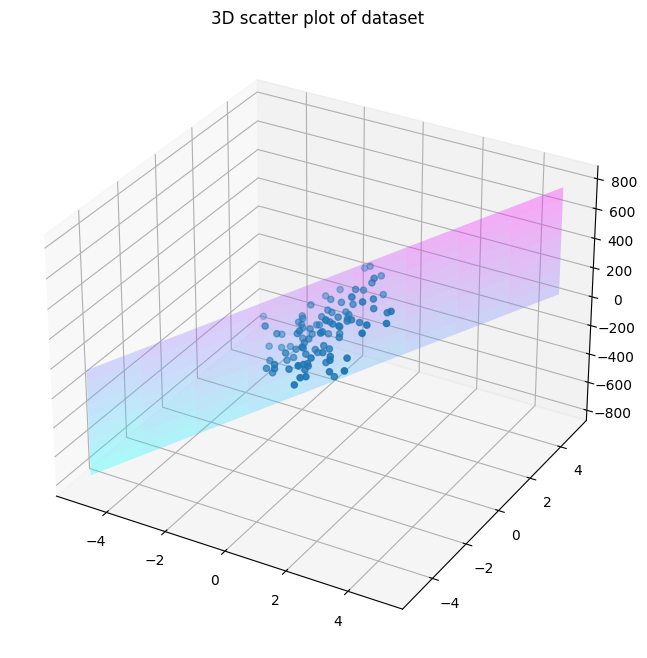

In [16]:
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection="3d")

ax.scatter3D(df["feature1"], df["feature2"], df["target"])
ax.plot_surface(x, y, z, cmap="cool", alpha=0.3)
ax.set_title("3D scatter plot of dataset")
plt.show()

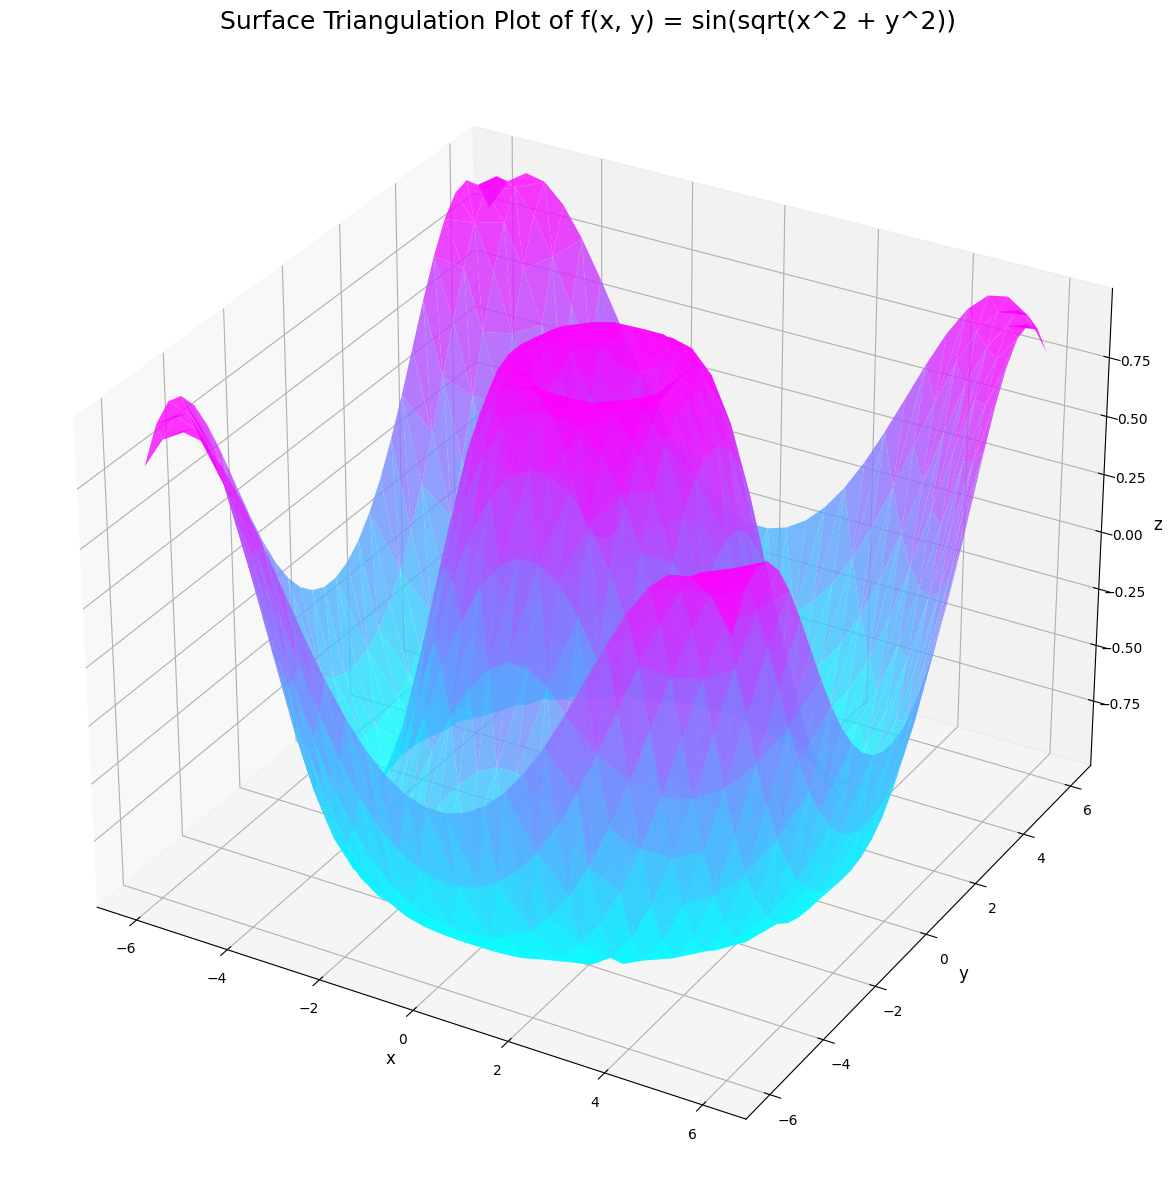

In [17]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.tri import Triangulation


def f(x: np.ndarray, y: np.ndarray) -> np.ndarray:
    return np.sin(np.sqrt(x**2 + y**2))


x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

tri = Triangulation(X.ravel(), Y.ravel())

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection="3d")

ax.plot_trisurf(tri, Z.ravel(), cmap="cool", edgecolor="none", alpha=0.8)

ax.set_title("Surface Triangulation Plot of f(x, y) = sin(sqrt(x^2 + y^2))", fontsize=18)
ax.set_xlabel("x", fontsize=12)
ax.set_ylabel("y", fontsize=12)
ax.set_zlabel("z", fontsize=12)

plt.show()

In [18]:
fig = go.Figure(
    data=[
        go.Mesh3d(
            x=X.ravel(),
            y=Y.ravel(),
            z=Z.ravel(),
            i=tri.triangles[:, 0],
            j=tri.triangles[:, 1],
            k=tri.triangles[:, 2],
            intensity=Z.ravel(),
        )
    ]
)

fig.update_layout(
    title="Surface Triangulation Plot of f(x, y) = sin(sqrt(x^2 + y^2))",
    scene=dict(
        xaxis_title="x",
        yaxis_title="y",
        zaxis_title="z",
    ),
)

fig.show()